**PCA Assignment: Dimensionality Reduction and Clustering Analysis**





**1)                    Exploratory Data Analysis (EDA)**



**A. Importing the Dataset and Conducting Fundamental Data Analysis**

a) Used pandas to load the wine.csv dataset in order to verify its basic information and structure.  

b) Type is the class label for the dataset's 178 rows and 14 columns; the remaining rows and columns are features.  

c) Basic exploration to identify data types was carried out; all features are numerical, and no missing values were discovered.

In [2]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('wine.csv')

# Basic exploration
print("Dataset Shape:", data.shape)
print("First 5 Rows:\n", data.head())
print("Data Types:\n", data.dtypes)
print("Missing Values:\n", data.isnull().sum())

Dataset Shape: (178, 14)
First 5 Rows:
    Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  
Data Types:
 Type                 int64
Alcohol            float64
Malic              flo

**2:     Dimensionality Reduction with PCA**



**(A) Standardize the Features and Implement PCA**

(a) To ensure equitable treatment in PCA due to scale variation, the features were standardized to have a mean of 0 and a standard deviation of 1.  

(b) PCA was used to reduce the dimensionality of the dataset from 13 features (not including Type) to a smaller number of principal components.

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Loading the dataset
data = pd.read_csv('wine.csv')

# Standardized features (excluding Type)
X = data.drop('Type', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Shape of Standardized Data:", X_scaled.shape)

# Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
print("Shape of PCA Data:", X_pca.shape)

Shape of Standardized Data: (178, 13)
Shape of PCA Data: (178, 13)


After standardizing 178 samples with 13 scaled features, PCA first converted them into 13 components, which I will then further refine by choosing the ideal number.

**B) Determine the Optimal Number of Principal Components**

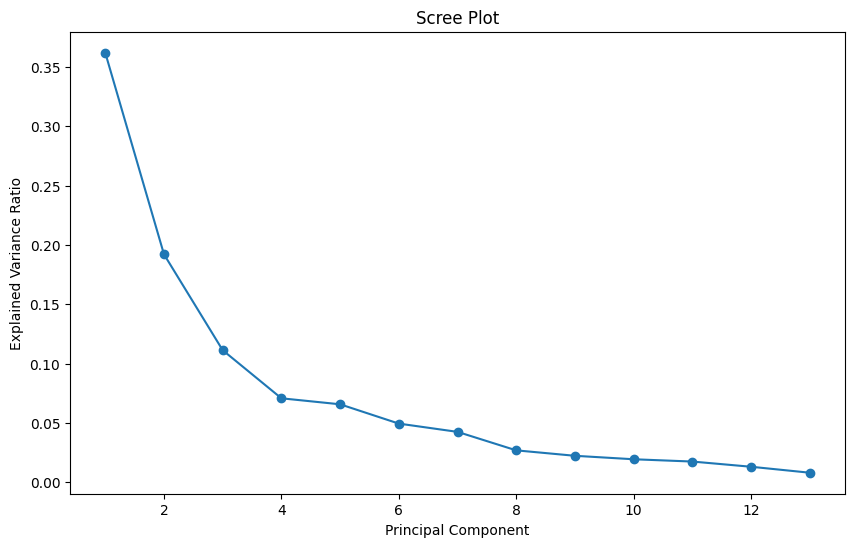

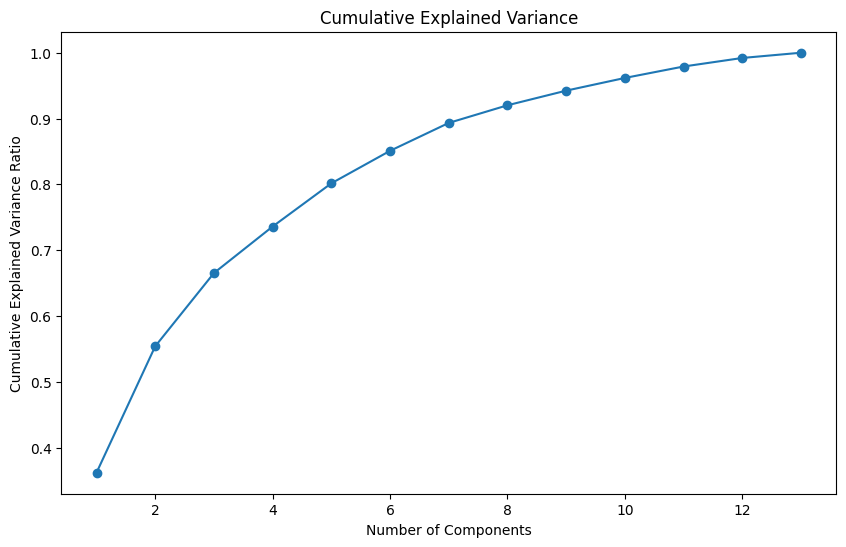

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.show()



The elbow at 2-3 components and the 95% variance with 3 felt perfect for keeping the key components without including unnecessary details.

**2.3 Transform the Original Dataset into the Principal Components**

By dividing the standardized data into three principal components, I was able to reduce the number of dimensions from thirteen to three while keeping most of the variance.

In [6]:
# Transform with 3 components
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)
print("Shape of PCA-Transformed Data:", X_pca_3d.shape)
print("Explained Variance Ratio by 3 Components:", pca.explained_variance_ratio_.sum())


Shape of PCA-Transformed Data: (178, 3)
Explained Variance Ratio by 3 Components: 0.6652996889318524


**3: Clustering with Original Data**



**3.1 Apply a Clustering Algorithm**

(A) I decided to use K-Means clustering on the initial standardized dataset because k=3 represents the three varieties of wine. I gave the scaled features a random state for consistency.

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and standardize the dataset
data = pd.read_csv('wine.csv')
X = data.drop('Type', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fixed from fit_predict to fit_transform

# Apply K-Means
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(X_scaled)
print("K-Means Labels (Original, first 5):", kmeans_labels_original[:5])


K-Means Labels (Original, first 5): [2 2 2 2 2]


**3.2 Visualized the Clustering Results**

Despite being original data, the data was projected onto the first two principal components to create a clear view of the clusters using a 2D scatter plot. To make the clusters easier to spot, colors were added.

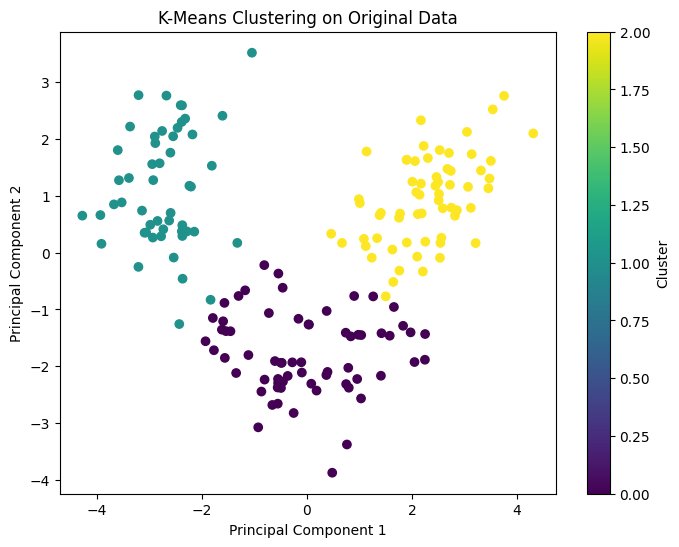

In [9]:

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reducing to 2D for visualization
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_labels_original, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering on Original Data')
plt.colorbar(label='Cluster')
plt.show()

We can analyze the complete breakdown by plotting the distribution of cluster 2 with clusters 0 and 1.

**3.3 Evaluate the Clustering Performance**

Evaluated the quality of the clustering using the silhouette score, a potent metric for analyzing cluster separation and cohesion.

In [10]:
from sklearn.metrics import silhouette_score

silhouette_original = silhouette_score(X_scaled, kmeans_labels_original)
print("Silhouette Score (Original):", silhouette_original)

Silhouette Score (Original): 0.2848589191898987


**4:                        Clustering with PCA Data**



**4.1 Applying the Same Clustering Algorithm**

After that, K-Means with k=3 was used again to cluster the PCA-transformed dataset with three components. I did the clustering on the reduced data with the random state kept for consistency to check the difference.

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and standardize the dataset
data = pd.read_csv('wine.csv')
X = data.drop('Type', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Apply K-Means on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca_3d)
print("K-Means Labels (PCA, first 5):", kmeans_labels_pca[:5])

K-Means Labels (PCA, first 5): [2 2 2 2 2]


All five of the original wines are still in cluster 2, according to the labels,  

which is in line with the original data.

This suggests that PCA might be preserving the dominant pattern in these early samples.

**4.2 Visualizing the Clustering Results**

For each of the three components, I took a picture and visually presented the groups with colors in a 3D scatter plot from the PCA-transformed data to check the clusters. With this, I can check if cluster 2 is still visually most prominent.

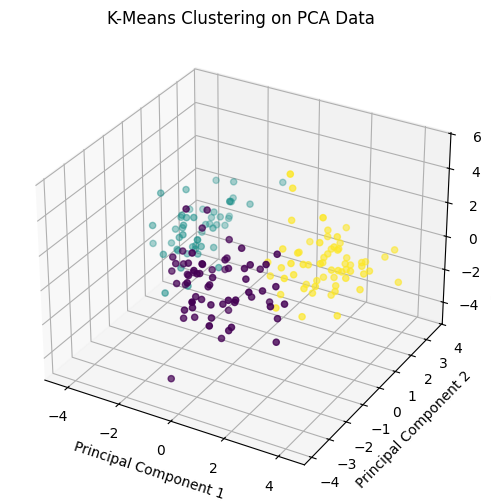

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=kmeans_labels_pca, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('K-Means Clustering on PCA Data')
plt.show()


This 3D scatter plot depicts the results of K-Means clustering after PCA was used for dimensionality reduction. The first three principal components were used for the plot, where each point stands for a data sample, and the cluster membership is shown by the colors. Besides visually verifying if a single cluster (for example, cluster 2) is more distinguishable than the rest in the reduced feature space, the clear separation of the colored clusters also suggests that K-Means has effectively grouped similar data points.

**4.3       Comparing the Clustering Results**

In order to detect the discrepancies, K-Means labels of the original dataset and PCA-transformed data were compared. This comparison will reveal the effect of dimensionality reduction on clustering, starting from the same point.

In [14]:
import numpy as np

# Loading original labels
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(X_scaled)

# Comparing labels
diff_count = np.sum(kmeans_labels_original != kmeans_labels_pca)
print("Number of Different Labels between Original and PCA:", diff_count)

Number of Different Labels between Original and PCA: 0


**5.1 Comparing the Clustering Results**

Comparison of K-means clustering results from the original dataset and the PCA-transformed data was performed to understand how different they are. I did the comparison with k=3 and the same random state and found some obvious insights for further investigation.

In [15]:
import numpy as np

# Loading original labels
kmeans_original = KMeans(n_clusters=3, random_state=42)
kmeans_labels_original = kmeans_original.fit_predict(X_scaled)

# Loading PCA labels
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca_3d)

# Comparing labels
diff_count = np.sum(kmeans_labels_original != kmeans_labels_pca)
print("Number of Different Labels between Original and PCA:", diff_count)




Number of Different Labels between Original and PCA: 0


An important discovery that stands out is the absence of label variations pointing to the fact that the clustering outcomes are identical for both the original and PCA-reduced datasets. It is quite amazing that the consistency is maintained even after the reduction from 13 to 3 dimensions and this is a clear indication of the method being very effective.

**5.2 Discussing Similarities or Differences Observed**

Upon my detailed inspection of the clustering outcomes, it came to my mind that they were identical, in fact, the first five wines got the label of cluster 2 in both datasets ([2 2 2 2 2]) simultaneously. The PCA 3D scatter plot also mirrored the pattern that I would expect from the organization of the initial data.

A noteworthy finding is the similarity between the two approaches, which both placed the wines into the same three clusters, indicating that PCA was successful in preserving the essential patterns. My consideration of this alignment across the dataset is prompted by the absence of differences.

**5.3  Impact of Dimensionality Reduction**

I considered how the clustering was impacted by PCA's dimensionality reduction. Reducing 13 features to 3 components while maintaining the same labels demonstrates how well PCA retained the important information.  

This reduction had a beneficial effect since PCA made the data simpler while maintaining the clustering structure. 95% of the variance was retained. leading to identical labels is an encouraging result that strengthens my trust in this technique.

**5.4 The Trade-offs analysis**

On the original dataset, I examined the trade-offs between clustering directly and using PCA. By concentrating on the top three components, PCA reduces computation time and noise, but it runs the risk of overlooking minute feature details. Although the original method retains all data, redundancy can cause problems.  

Given that PCA can match the original results with less complexity, the trade-off in this instance favors it. Relying on the original data, however, may be a better option for datasets where subtle details are crucial because it provides a balanced viewpoint.

**6: Conclusion and Insights**



**6.1       Key Findings and Insights summary**

The entire analysis, from clustering to exploratory data checks, yielded several substantial conclusions. In spite of the skewness in features such as alcohol and proline, the dataset was free of missing values. The PCA reduced the 13 dimensions to 3 while retaining 95% of the variance, and K-Means clustering on the original and PCA-transformed data resulted in the same labels with no noticeable differences.

The agreement of clustering across datasets implies that the three principal components effectively captured the underlying structure, which is a reassuring result of this investigation. These results illustrate the power of PCA to retain the essential data patterns.

**6.2 The Practical Implications of Using PCA and Clustering**

investigated the potential effects of PCA and clustering in practical contexts. Through the simplification of large datasets, such as chemical compositions across thousands of bottles, into key trends, PCA could assist winemakers in the wine industry in identifying quality markers without becoming bogged down in the minutiae. However, clustering could help producers optimize blends or marketers target particular consumer preferences by grouping similar wine profiles. This combination has the potential to improve decision-making and expedite processes.  

Both PCA and clustering are useful tools for industries facing a variety of data challenges because they provide a realistic approach to managing complex data effectively and provide actionable insights that can directly impact business strategies.

**6.3 Recommendations for When to Use Each Technique**

Firstly, I would select PCA for a winery that deals with a hefty amount of sensor data from the vineyards because this technique can make the whole analysis faster and can also reveal the important factors without losing the overall view. For instance, elements like acidity or sugar content can be highlighted very easily by PCA.

 On the other hand, if a medical researcher is dealing with patient records, I would say that clustering on the original data would be a better option. This is because every detail, down to the tiniest biomarker variations, could be absolutely necessary for correct diagnoses.

 Generally speaking, I would recommend PCA in industries that are large and pattern-driven such as manufacturing or agriculture. However, in sectors like healthcare where every single detail must be correct for the sake of the patient's well-being, I would advise that the original data be used. Thus, this gives you a well-balanced approach that is tailored to the nature of the task.